In [1]:
import numpy as np
import matplotlib.pyplot as plt

(-6.0, 6.0)

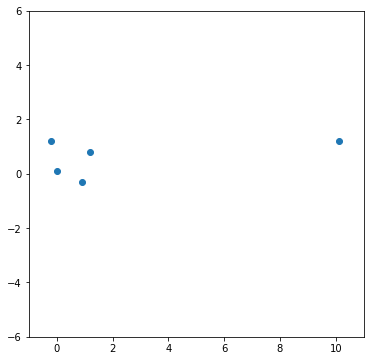

In [7]:
X,Y = np.array([[0,0.1],[-0.2,1.2],[0.9,-0.3],[1.2,0.8],[10.1,1.2]]).T

plt.figure(figsize=(6,6))
plt.scatter(X, Y)
plt.xlim(-1,11)
plt.ylim(-6,6)

In [20]:
def mh(samplesize=10**4, eps=1e-2, loglikelihood=(lambda x,y:0), random_state=42):
    np.random.seed(random_state)
    pre_x, pre_y = 0,0
    samples = [[pre_x, pre_y]]
    pre_ll = loglikelihood(*samples[-1])
    accept = [False]
    for _ in range(1, samplesize):
        new_x, new_y = samples[-1]
        new_x += np.random.normal(0,eps)
        new_y += np.random.normal(0,eps)
        new_ll = loglikelihood(new_x, new_y)
        f = new_ll>=pre_ll or np.random.rand()<np.exp(-pre_ll+new_ll) 
        if new_ll>=pre_ll or np.random.rand()<np.exp(-pre_ll+new_ll):
            pre_x, pre_y = new_x, new_y
            pre_ll = new_ll
        samples += [[pre_x, pre_y]]
        accept += [f]
    return np.array(samples), np.array(accept)

In [58]:
def square(x,y):
    return (-(X-x)**2-(Y-y)**2).sum()/2

In [87]:
xy, ac = mh(loglikelihood=square, eps=1e-1*4)

In [88]:
ac.sum()

5952

(-7.0, 7.0)

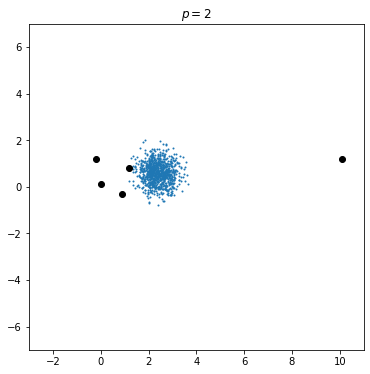

In [89]:
plt.figure(figsize=(6,6))
plt.scatter(*xy[10**3::10].T, color='C0', s=1)
plt.scatter(X, Y, color='k')
plt.title(r"$p=2$")
plt.xlim(-3,11)
plt.ylim(-7,7)

In [62]:
def absolute(x,y):
    return (-np.abs(X-x)-np.abs(Y-y)).sum()

In [91]:
xy, ac = mh(loglikelihood=absolute, eps=1e-1*4)

In [92]:
ac.sum()

6355

(-7.0, 7.0)

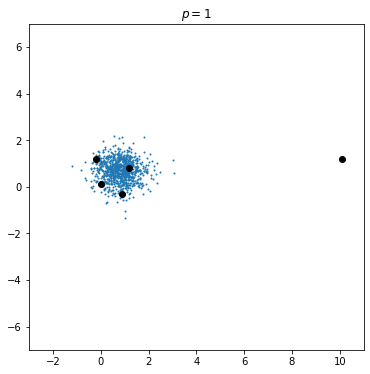

In [93]:
plt.figure(figsize=(6,6))
plt.scatter(*xy[10**3::10].T, color='C0', s=1)
plt.scatter(X, Y, color='k')
plt.title(r"$p=1$")
plt.xlim(-3,11)
plt.ylim(-7,7)

In [94]:
def sqrt(x,y):
    return (-np.sqrt(np.abs(X-x))-np.sqrt(np.abs(Y-y))).sum()*2

In [100]:
xy, ac = mh(samplesize=10**5, loglikelihood=sqrt, eps=1e-1*4)

In [101]:
ac.sum()

54744

(-7.0, 7.0)

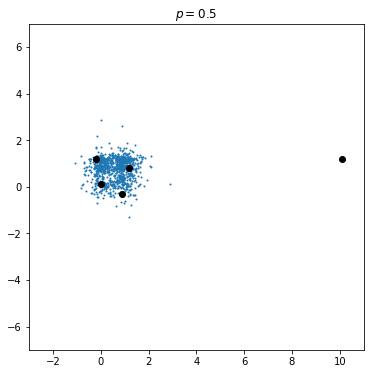

In [102]:
plt.figure(figsize=(6,6))
plt.scatter(*xy[10**3::100].T, color='C0', s=1)
plt.scatter(X, Y, color='k')
plt.title(r"$p=0.5$")
plt.xlim(-3,11)
plt.ylim(-7,7)

(-2.0, 3.0)

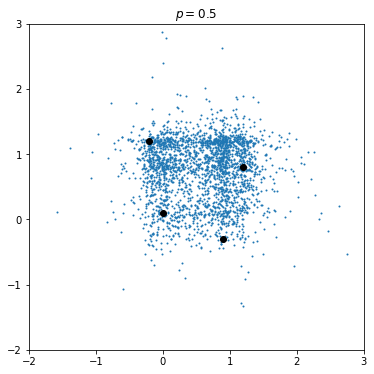

In [107]:
plt.figure(figsize=(6,6))
plt.scatter(*xy[10**3::40].T, color='C0', s=1)
plt.scatter(X, Y, color='k')
plt.title(r"$p=0.5$")
plt.xlim(-2,3)
plt.ylim(-2,3)

In [83]:
def mid(x,y):
    return (-np.abs(X-x)**1.5-np.abs(Y-y)**1.5).sum()/1.5

In [98]:
xy, ac = mh(loglikelihood=mid, eps=1e-1*4)

(-7.0, 7.0)

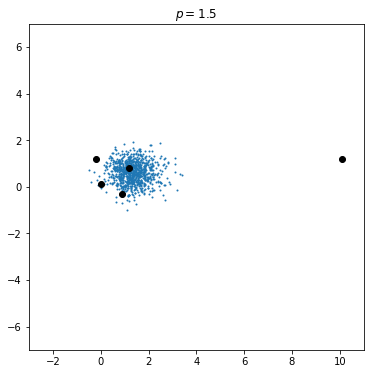

In [99]:
plt.figure(figsize=(6,6))
plt.scatter(*xy[10**3::10].T, color='C0', s=1)
plt.scatter(X, Y, color='k')
plt.title(r"$p=1.5$")
plt.xlim(-3,11)
plt.ylim(-7,7)

(-7.0, 7.0)

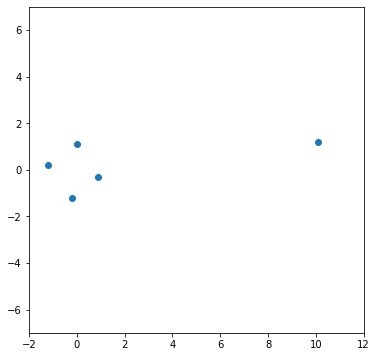

In [110]:
X,Y = np.array([[0,1.1],[-0.2,-1.2],[0.9,-0.3],[-1.2,0.2],[10.1,1.2]]).T

plt.figure(figsize=(6,6))
plt.scatter(X, Y)
plt.xlim(-2,12)
plt.ylim(-7,7)

In [116]:
xy, ac = mh(samplesize=10**6, loglikelihood=sqrt, eps=1e-1*4)

(-7.0, 7.0)

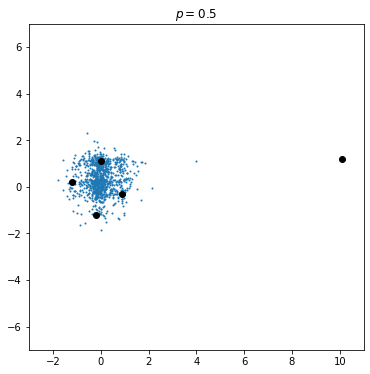

In [117]:
plt.figure(figsize=(6,6))
plt.scatter(*xy[10**3::1000].T, color='C0', s=1)
plt.scatter(X, Y, color='k')
plt.title(r"$p=0.5$")
plt.xlim(-3,11)
plt.ylim(-7,7)

(-2.5, 2.5)

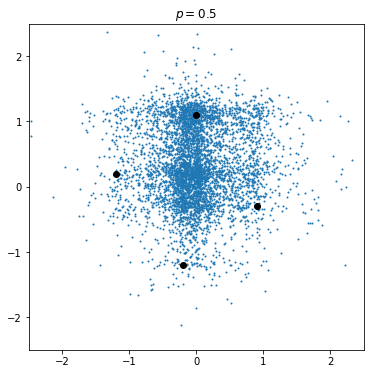

In [120]:
plt.figure(figsize=(6,6))
plt.scatter(*xy[10**3::200].T, color='C0', s=1)
plt.scatter(X, Y, color='k')
plt.title(r"$p=0.5$")
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)

In [151]:
def deviation_p(x,y,p):
    return (-(np.sqrt((X-x)**2)+np.sqrt((Y-y)**2))**p).sum()/p

def d2(x,y):
    return deviation_p(x,y,2)
def d1(x,y):
    return deviation_p(x,y,1)
def d05(x,y):
    return deviation_p(x,y,0.5)
def d15(x,y):
    return deviation_p(x,y,1.5)
def d01(x,y):
    return deviation_p(x,y,0.1)
def d3(x,y):
    return deviation_p(x,y,3)
def d4(x,y):
    return deviation_p(x,y,4)
def d100(x,y):
    return deviation_p(x,y,100)

In [139]:
xy, ac = mh(samplesize=10**5, loglikelihood=d2, eps=0.4)

(-7.0, 7.0)

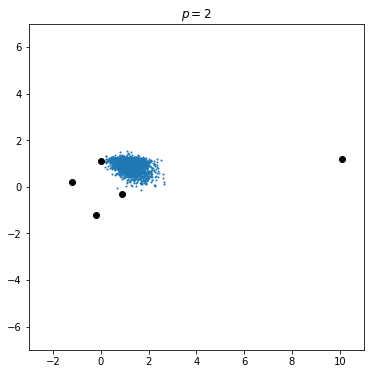

In [140]:
plt.figure(figsize=(6,6))
plt.scatter(*xy[10**3::50].T, color='C0', s=1)
plt.scatter(X, Y, color='k')
plt.title(r"$p=2$")
plt.xlim(-3,11)
plt.ylim(-7,7)

In [129]:
xy, ac = mh(samplesize=10**5, loglikelihood=d1, eps=0.4)

(-7.0, 7.0)

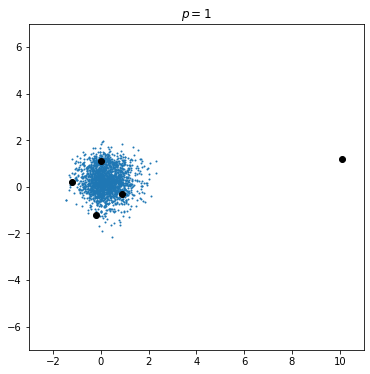

In [130]:
plt.figure(figsize=(6,6))
plt.scatter(*xy[10**3::50].T, color='C0', s=1)
plt.scatter(X, Y, color='k')
plt.title(r"$p=1$")
plt.xlim(-3,11)
plt.ylim(-7,7)

In [131]:
xy, ac = mh(samplesize=10**5, loglikelihood=d05, eps=0.4)

(-7.0, 7.0)

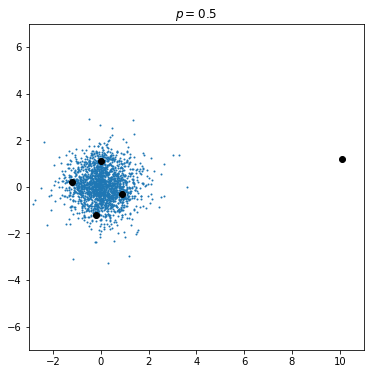

In [133]:
plt.figure(figsize=(6,6))
plt.scatter(*xy[10**3::50].T, color='C0', s=1)
plt.scatter(X, Y, color='k')
plt.title(r"$p=0.5$")
plt.xlim(-3,11)
plt.ylim(-7,7)

In [135]:
xy, ac = mh(samplesize=10**5, loglikelihood=d01, eps=0.4)

(-7.0, 7.0)

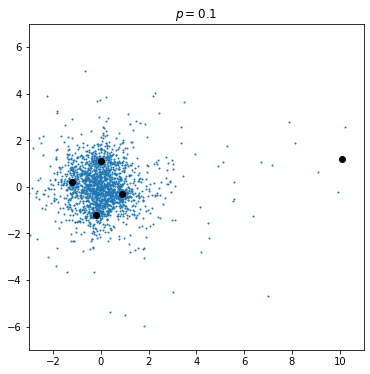

In [136]:
plt.figure(figsize=(6,6))
plt.scatter(*xy[10**3::50].T, color='C0', s=1)
plt.scatter(X, Y, color='k')
plt.title(r"$p=0.1$")
plt.xlim(-3,11)
plt.ylim(-7,7)

In [137]:
xy, ac = mh(samplesize=10**5, loglikelihood=d15, eps=0.4)

(-7.0, 7.0)

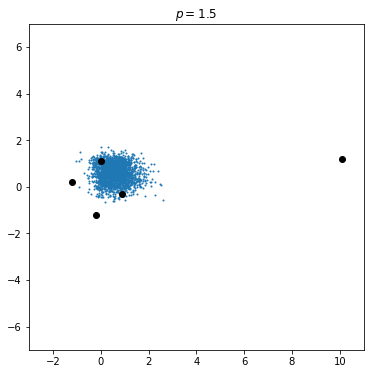

In [138]:
plt.figure(figsize=(6,6))
plt.scatter(*xy[10**3::50].T, color='C0', s=1)
plt.scatter(X, Y, color='k')
plt.title(r"$p=1.5$")
plt.xlim(-3,11)
plt.ylim(-7,7)

In [146]:
xy, ac = mh(samplesize=10**5, loglikelihood=d3, eps=0.4)

(-7.0, 7.0)

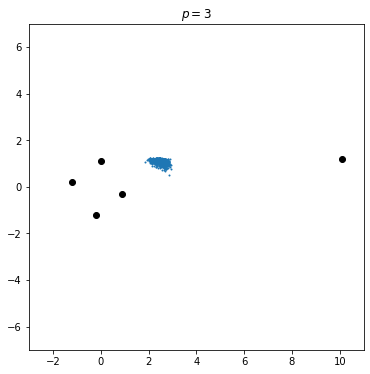

In [147]:
plt.figure(figsize=(6,6))
plt.scatter(*xy[10**3::50].T, color='C0', s=1)
plt.scatter(X, Y, color='k')
plt.title(r"$p=3$")
plt.xlim(-3,11)
plt.ylim(-7,7)

In [148]:
xy, ac = mh(samplesize=10**5, loglikelihood=d4, eps=0.4)

(-7.0, 7.0)

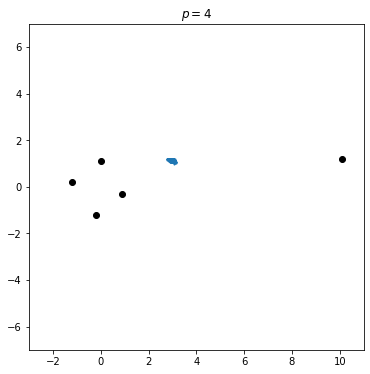

In [149]:
plt.figure(figsize=(6,6))
plt.scatter(*xy[10**3::50].T, color='C0', s=1)
plt.scatter(X, Y, color='k')
plt.title(r"$p=4$")
plt.xlim(-3,11)
plt.ylim(-7,7)

In [154]:
xy, ac = mh(samplesize=10**5, loglikelihood=d100, eps=0.001)

In [160]:
ac[5*10**4].sum()

0

(-7.0, 7.0)

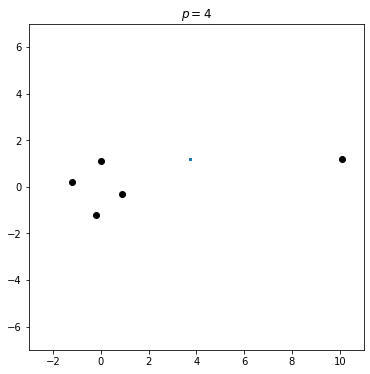

In [158]:
plt.figure(figsize=(6,6))
plt.scatter(*xy[10**4*5::50].T, color='C0', s=1)
plt.scatter(X, Y, color='k')
plt.title(r"$p=4$")
plt.xlim(-3,11)
plt.ylim(-7,7)

(0.0, 2.0)

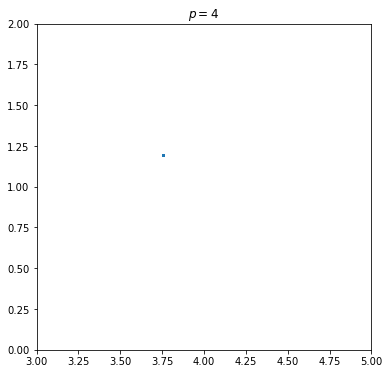

In [159]:
plt.figure(figsize=(6,6))
plt.scatter(*xy[10**4*5::50].T, color='C0', s=1)
plt.scatter(X, Y, color='k')
plt.title(r"$p=4$")
plt.xlim(3,5)
plt.ylim(0,2)

In [150]:
ac.sum()

2127